<img src="https://becasparatodos.com/wp-content/uploads/2017/01/tec-de-monterrey-maestr%C3%ADas.jpg" style="width: 400px;"/>

<h2><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h2>

<h4><center>Course: TC3020.1 (Machine Learning)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Final Project - Evaluation</center></h4>
    
<h4><center>Date: November 13, 2020</center></h4>
<h4><center><font color="red">Submit: November 24, 2020</font></center></h4>

---

<h4>Grade: </h4>

---
<h4><center>Student's information</center></h4>
<h4>Names:</h4> 
<p>
Anne Constanze Schreiber Brito 
<br> 
Juan José del Castillo Ramírez 
<br>
Natalia Guevara Muñoz 
<br> 
Pablo Ivan Barajas Urbina 
<br> 
Jorge Arturo Alcalá Hernández
</p>    
<h4>Students ID:</h4> <p>
A01650066
<br>
A01654012
<br>
A01338719
<br>
A01652848
<br>
A01337873
</p>  
<h4>Github:</h4>
<p>
Anne: https://github.com/ACSBSC/Machine_Learning_A01650066/tree/master/proyecto 
<br>
Juan José: https://github.com/JuanJodelCast/ProyectoML
<br>
Natalia: https://github.com/Natalia670/Machine-Learning
<br>
Pablo: https://github.com/pelcec/Aprendizaje_Maquina/tree/master/Proyecto_final
<br>
Jorge: https://github.com/jorgealcalah/Aprendizaje_Maquina
</p>

## <font color="brown">Proyecto Final - Aprendizaje Máquina</font>

---

Indicaciones: El proyecto seleccionado será desarrollado siguiendo ciertas condiciones. Deberán seguir la estructura recomendada (pero podrán cambiar títulos, es sólo una sugerencia) y podrán añadir secciones en caso de que ser necesario.

* La entrega límite de entrega de la notebook será: Martes 24 de noviembre.
* Deberán realizar una exposición (entre 10 y 20 minutos a lo mucho), donde proporcionen una explicación acerca de la metodología implementada y los resultados obtenidos.

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.
En caso de no tener la información aquí solicitada, no se evaluará el proyecto.

<a id="general"></a>
### Contenido

-----

1. [Objetivo](#a)

2. [Implementación del código](#b)
    * Entrenamiento de los datos
        * Importación de librerias
        * Extracción de datos de las IMG
        * Mostrar contenido de los IMG
        * Definición del modelo
        * Entrenamiento del modelo
    * Interfaz Gráfica
      * Importaciones de la librería
      * Modelo
      * vid1
      * vid2
      * creación del GUI

-----

3. [Conclusiones](#c)

-----

<a id="a"></a>
### 1. Objetivo

---
[Regresar a contenido](#general)

El objetivo dentro de este proyecto es poder crear diferentes emojis dependiendo de las emociones que muestre el rostro humano. Esto a partir de la detección del rostro por camara y del entrenamiento de la máquina para poder distinguir las emociones mostradas.

<a id="b"></a>
### 2. Implementación del código
---
[Regresar a contenido](#general)

<p> Hace imports de las librerías a usar para el entrenamiento </p>

In [ ]:
#!pip install keras
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime

from keras.utils import plot_model

<p>Se aduieren los datos para el train y el test, el cual son conjunto de imagenes</p><br>
<p>Después se realiza un conteo para ve cuántas imágenes por emoción hay</p>

In [ ]:
#train_dir = '/content/drive/My Drive/Colab Notebooks/archive/train/'
#test_dir = '/content/drive/My Drive/Colab Notebooks/archive/test/'
train_dir = 'archive/train/'
test_dir = 'archive/test/'


row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


<p>Se realizan plots para ver a detalle la cantidad de imágenes por emoción</p><br>
<p>Se obtienen 2 diferentes plots, uno para train y otro para test</p>

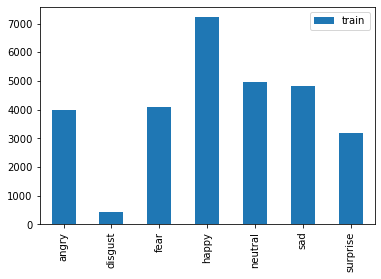

In [ ]:
train_count.transpose().plot(kind='bar')

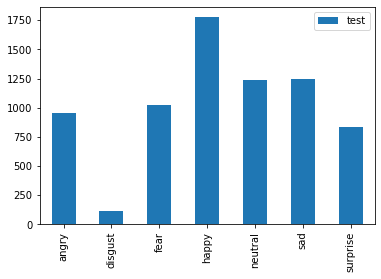

In [ ]:
test_count.transpose().plot(kind='bar')

<p>Se muestran imágenes ejemplo por emoción dentro de la variable train</p>

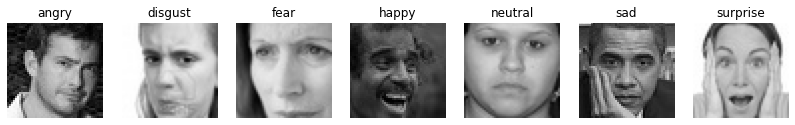

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

<p>Se crean los sets normalizados para el test y el train, basicamente las imágenes se ajustan a un tamaño y escala de colores para normalizarlos </p>

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
test_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

<p> Se define el modelo a utilizar con sus capas ocultas </p>
<p>El modelo se basa en capas de redes neuronales, el cual trabaja con aprendizaje supervisado. En este caso este utiliza CNN, la cual es un modelo perteneciente a las redes neuronales que procesa sus capas imitando al cortex visual del ojo humano para identificar distintas características en las entradas que en definitiva hacen que pueda identificar objetos y “ver”. 

Para ello, la CNN contiene varias capas ocultas especializadas y con una jerarquía: esto quiere decir que las primeras capas pueden detectar lineas, curvas y se van especializando hasta llegar a capas más profundas que reconocen formas complejas como un rostro o la silueta de un animal.
Para entrenar este tipo de modelos, necesitmaos varias fotos.</p>

In [ ]:
def get_model(input_size, classes=7):
     #Initialising the CNN
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

<p> Se obtiene el resumen del modelo que se creó y se guardó</p>

In [ ]:
fernet = get_model((row,col,1), classes)
fernet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 256)      

<p>Se crea los callbacks para usarlo más adelante en ele entrenamiento del modelo</p>

In [ ]:
# 
chk_path = 'ferNet.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

<p> Se entrena el modelo </p>

In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = fernet.fit(x=training_set,
                 validation_data=test_set,
                 epochs=20,
                 callbacks=callbacks,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/20
448/448 [==============================] - ETA: 0s - loss: 4.2117 - accuracy: 0.2680
Epoch 00001: val_loss improved from inf to 4.99462, saving model to ferNet.h5
448/448 [==============================] - 1598s 4s/step - loss: 4.2117 - accuracy: 0.2680 - val_loss: 4.9946 - val_accuracy: 0.2192
Epoch 2/20
448/448 [==============================] - ETA: 0s - loss: 3.4578 - accuracy: 0.3239
Epoch 00002: val_loss improved from 4.99462 to 3.04676, saving model to ferNet.h5
448/448 [==============================] - 869s 2s/step - loss: 3.4578 - accuracy: 0.3239 - val_loss: 3.0468 - val_accuracy: 0.3943
Epoch 3/20
448/448 [==============================] - ETA: 0s - loss: 2.9160 - accuracy: 0.3602
Epoch 00003: val_loss improved from 3.04676 to 2.56781, saving model to ferNet.h5
448/448 [==============================] - 405s 904ms/step - loss: 2.9160 - accuracy: 0.3602 - val_loss: 2.5678 - val_accuracy: 0.4203
Epoch 4/20
448/448 [==============================] - ETA: 0s - loss: 

<p> Importaciones de librerías para la parte gráfica y muestra del video e imágen<p>

In [ ]:
#!pip install opencv-python

import tkinter as tk
from tkinter import *
import cv2
from PIL import Image, ImageTk
import os
#import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils import plot_model

<p> Se crea el modelo con los pesos del modelo previamente guardado fernet, el uso de esto es concido como transferencia de aprendizaje, ya que utiliza un modelo pre-establecido y guardado para usarlo y mejorarlo dentro de otro modelo.</p>

In [ ]:
model = tf.keras.models.Sequential()   

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))
model.load_weights('ferNet.h5')

<p>Se crea un diccionario para las emociones y se relacionan con las imágenes de emojis</p>

In [ ]:
cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "   Angry   ", 1: "Disgusted", 2: "  Fearful  ", 3: "   Happy   ", 4: "  Neutral  ", 5: "    Sad    ", 6: "Surprised"}


emoji_dist={0:"Emojis/emojis/angry.png",2:"Emojis/emojis/disgusted.png",2:"Emojis/emojis/fearful.png",3:"Emojis/emojis/happy.png",
            4:"Emojis/emojis/neutral.png",5:"Emojis/emojis/sad.png",6:"Emojis/emojis/surpriced.png"}

<p>Se inicializa el frame de la GUI</p>

In [ ]:
global last_frame1                                   
last_frame1 = np.zeros((480, 640, 3), dtype=np.uint8)
global cap1
show_text=[0]

<p> Se crea la función vid1 para mostrar en el primer rectángulo el video con el reconocimiento de donde se encuentra la cara por medio de un rectángulo azul </p>

In [ ]:
def show_vid():      
    #cap1 = cv2.VideoCapture(0)                                 
    if not cap1.isOpened():                             
        print("cant open the camera1")
    flag1, frame1 = cap1.read()
   # frame1 = cv2.resize(frame1,(600,500))

    bounding_box = cv2.CascadeClassifier('Emojis/Cascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame1, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame1, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        show_text[0]=maxindex
    if flag1 is None:
        print ("Major error!")
    elif flag1:
        global last_frame1
        last_frame1 = frame1.copy()
        pic = cv2.cvtColor(last_frame1, cv2.COLOR_BGR2RGB)     
        img = Image.fromarray(pic)
        imgtk = ImageTk.PhotoImage(image=img)
        lmain.imgtk = imgtk
        lmain.configure(image=imgtk)
        lmain.after(10, show_vid)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        exit()
    
    '''_, frame = cap.read()
    cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    bounding_box = cv2.CascadeClassifier('Emojis/Cascades/haarcascade_frontalface_default.xml')
    
    num_faces = bounding_box.detectMultiScale(cv2image,scaleFactor=1.3, minNeighbors=5)  
    
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = cv2image[y:y + h, x:x + w]
        a = cv2.resize(roi_gray_frame, (48, 48))
       
        b = np.expand_dims(a, -1)
        

        c = np.expand_dims(b, 0)
        #c.reshape(48,48,1)
        #c = tf.reshape(c,[48,48,1])
        #print(c.shape)
   
       
        cropped_img = c #np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        show_text[0]=maxindex
        
        global last_frame
        last_frame = frame.copy()
        pic = cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB)
        
        img = Image.fromarray(pic)
        imgtk = ImageTk.PhotoImage(image=img)
        lmain.imgtk = imgtk
        lmain.configure(image=imgtk)
        lmain.after(100, show_vid)'''
       
    

<p>Se crea la función vid2, el cual representa el segundo espacio dentro de la interfaz, donde se va a mostrar el emoji según el reconocimiento facial de emociones</p>

In [ ]:
def show_vid2():
    frame2=cv2.imread(emoji_dist[show_text[0]])
    pic2=cv2.cvtColor(frame2, cv2.COLOR_BGR2RGBA)
    img2=Image.fromarray(frame2)
    imgtk2=ImageTk.PhotoImage(image=img2)
    lmain2.imgtk2=imgtk2
    lmain3.configure(text=emotion_dict[show_text[0]],font=('arial',45,'bold'))
    
    lmain2.configure(image=imgtk2)
    lmain2.after(10, show_vid2)

<p> En esta sección es el main para crear la interfaz gráfica, y es aquí donde se llaman las funciones de vid1 y vid2 </p>

In [ ]:
if __name__ == '__main__':
    root=tk.Tk()   
    #img = ImageTk.PhotoImage(Image.open("angry.png"))
    #heading = Label(root,image=img,bg='black')
    
    #heading.pack() 
    #heading2=Label(root,text="Photo to Emoji",pady=20, font=('arial',45,'bold'),bg='black',fg='#CDCDCD')                                 
    
    #heading2.pack()
    lmain = tk.Label(master=root,padx=50,bd=10)
    lmain2 = tk.Label(master=root,bd=10)

    lmain3=tk.Label(master=root,bd=10,fg="#CDCDCD",bg='black')
    lmain.pack(side=LEFT)
    lmain.place(x=50,y=250)
    lmain3.pack()
    lmain3.place(x=960,y=250)
    lmain2.pack(side=RIGHT)
    lmain2.place(x=900,y=350)
    


    root.title("Photo To Emoji")            
    root.geometry("1400x900+100+10") 
    root['bg']='black'
    exitbutton = Button(root, text='Quit',fg="red",command=root.destroy,font=('arial',25,'bold')).pack(side = BOTTOM)
    
    cap1 = cv2.VideoCapture(0)
    show_vid()
    show_vid2()
    root.mainloop()

<a id="c"></a>
### 3. Conclusión

---
[Regresar a contenido](#general)



<p>A pesar que el la precisión del modelo entrenado sea del 61%, el modelo logra acertar la mayoría de veces la expresión emocional desplegada en el rostro de la persona. También podemos observar que lográ predecir a tiempo real a través de un video, el cual lo hace más dificil de predecir, ya que este no es una imágen estática. </p><br>
<p>Para mejoral la presición de nuestro modelo podemos hacer uso más imágenes para entrenarlo o hacer uso de un modelo ya pre-definido u otro modelo. Si un modelo se usa dentro de otro modelo, este va a mejorar la precisión de nuestro modelo original. Uno de los modelos pre-definidos que podemos utilizar, son lo que ofrece keras, y a través del uso de tranfer learning, podemos utilizar varios modelos para mejorar el nuestro actual y subir su presición de aprendizaje y de predicción.</p>